In [3]:
import pandas as pd
import numpy as np

In [5]:
#import Scraped data
scopus_data = pd.read_csv('data/scopus_publications_publication_date_2024-06-20_13-08-04.csv')

In [12]:
scopus_data.head()

,Topic,Title,Authors,Publication,Date,Citations,Volume,Issue,Pages,DOI,Abstract,Year
0,artificial intelligence,Perspectives on label-free microscopy of heter...,Pham D.L.,Journal of biomedical optics,2025-12-01,0,29,No issue available,S22702,10.1117/1.JBO.29.S2.S22702,No abstract available,2025
1,artificial intelligence,Autoencoder-based image denoiser suitable for ...,Maghraby M.,Journal of Advanced Research in Applied Scienc...,2025-03-01,0,44,2,234-246,10.37934/araset.44.2.234246,No abstract available,2025
2,artificial intelligence,An Artificial Intelligence Approach to Monitor...,Haron N.H.,Journal of Advanced Research in Applied Scienc...,2025-02-01,0,44,1,105-119,10.37934/araset.44.1.105119,No abstract available,2025
3,artificial intelligence,Research on entertainment robots based on arti...,Xiaochun C.,Entertainment Computing,2025-01-01,0,52,No issue available,NaN,10.1016/j.entcom.2024.100761,No abstract available,2025
4,artificial intelligence,Application of E-Learning entertainment learni...,Chen H.,Entertainment Computing,2025-01-01,0,52,No issue available,NaN,10.1016/j.entcom.2024.100762,No abstract available,2025


## Supprimer les doublons par titre et conserver la première occurrence

In [9]:
# scopus_data =scopus_data.drop_duplicates(subset="Title",keep="first")
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data['Year'] = scopus_data['Date'].dt.year

In [10]:
scopus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Topic        1000 non-null   object        
 1   Title        1000 non-null   object        
 2   Authors      1000 non-null   object        
 3   Publication  1000 non-null   object        
 4   Date         1000 non-null   datetime64[ns]
 5   Citations    1000 non-null   int64         
 6   Volume       1000 non-null   object        
 7   Issue        1000 non-null   object        
 8   Pages        200 non-null    object        
 9   DOI          1000 non-null   object        
 10  Abstract     1000 non-null   object        
 11  Year         1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 90.0+ KB


In [39]:
scopus_data[['Citations','Year']].describe()

,Citations,Year
count,473.000000,473.000000
mean,0.069767,2024.169133
std,0.358604,0.375266
min,0.000000,2024.000000
25%,0.000000,2024.000000
50%,0.000000,2024.000000
75%,0.000000,2024.000000
max,4.000000,2025.000000


In [13]:
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Volume                 object
Issue                  object
Pages                  object
DOI                    object
Abstract               object
Year                    int32
dtype: object

##  S'assurer que 'Citations' est de type int pour les opérations de somme

In [14]:
scopus_data['Citations'] = pd.to_numeric(scopus_data['Citations']).fillna(0).astype(int)
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int32
Volume                 object
Issue                  object
Pages                  object
DOI                    object
Abstract               object
Year                    int32
dtype: object

## Calculer le nombre total de citations pour chaque Topic

In [29]:
total_citation = scopus_data.groupby("Topic")["Citations"].sum().reset_index(name="Total Cited")
# total_citation.rename(columns={"Citations":"Total Cited"},inplace=True)
total_citation.sort_values(by="Total Cited",ascending=False)

,Topic,Total Cited
17,renewable energy,12
2,autonomous vehicles,10
0,artificial intelligence,8
5,biotechnology,8
13,machine learning,8
14,nanotechnology,6
11,genomics,6
1,augmented reality,2
10,data science,2
8,computer vision,2


##  Analyser la répartition des publications par année

In [44]:
publications_per_year = scopus_data.groupby("Year")["Title"].count().reset_index(name="Publication")
publications_per_year

,Year,Publication
0,2024,393
1,2025,80


## Calculer des statistiques telles que la moyenne, la médiane, le minimum et le maximum des citations pour comprendre l'impact des citations des publications.

In [30]:
citation_statistics = { 'Mean Citations': scopus_data['Citations'].mean(),
    'Median Citations': scopus_data['Citations'].median(),
    'Min Citations': scopus_data['Citations'].min(),
    'Max Citations': scopus_data['Citations'].max() }

print("Statistiques de citations :")
for stat, value in citation_statistics.items():
     print(f"{stat} : {value:.2f}")

Statistiques de citations :
Mean Citations : 0.07
Median Citations : 0.00
Min Citations : 0.00
Max Citations : 4.00


## Identifier les publications avec les citations les plus élevées.

In [31]:
top_publications = scopus_data.sort_values(by="Citations",ascending=False).head(5)
top_publications.head(10)

,Topic,Title,Authors,Publication,Date,Citations,Volume,Issue,Pages,DOI,Abstract,Year
352,renewable energy,Unveiling the photocatalytic marvels: Recent a...,Askari N.,Journal of Environmental Sciences (China),2025-02-01,4,148,No issue available,283-297,10.1016/j.jes.2024.01.006,No abstract available,2025
852,renewable energy,Unveiling the photocatalytic marvels: Recent a...,Askari N.,Journal of Environmental Sciences (China),2025-02-01,4,148,No issue available,283-297,10.1016/j.jes.2024.01.006,No abstract available,2025
902,biotechnology,Hybrid and enhanced electrokinetic system for ...,Hamdi F.M.,Journal of Environmental Sciences (China),2025-01-01,3,147,No issue available,424-450,10.1016/j.jes.2023.11.005,No abstract available,2025
538,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,149,No issue available,358-373,10.1016/j.jes.2023.08.007,No abstract available,2025
38,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,149,No issue available,358-373,10.1016/j.jes.2023.08.007,No abstract available,2025


## Analyser la répartition des publications par auteurs. Cela peut aider à comprendre les modèles de collaboration.

In [48]:
publications_per_author = scopus_data.groupby('Authors').size().reset_index(name='Publications')
publications_per_author.sort_values(by="Publications",ascending=False).head(10)

,Authors,Publications
388,Wang Y.,5
228,Li Y.,3
225,Li L.,3
424,Zhang J.,3
430,Zhang Y.,3
213,Laskar M.R.,2
125,Gao Y.,2
153,Han S.,2
385,Wang R.,2
175,Huang S.,2


##  Auteur avec le plus de publications

In [64]:
author_counts = scopus_data['Authors'].value_counts()
(author_counts[author_counts == author_counts.max()]).reset_index(name='Publications')

,Authors,Publications
0,Wang Y.,5


## Revue (Publication) avec le plus  d'articles publiés

In [74]:
journal_counts = scopus_data['Publication'].value_counts()
(journal_counts[journal_counts == journal_counts.max()]).reset_index(name="Articles")
# journal_counts.head(5).reset_index(name="Articles")

,Publication,Articles
0,Scientific Reports,80


## Afficher les 5 revues avec le plus d'articles publiéss

In [76]:
journal_counts_5 = scopus_data["Publication"].value_counts()
journal_counts.head(5).reset_index(name="Articles")

,Publication,Articles
0,Scientific Reports,80
1,Journal of Advanced Research in Applied Scienc...,30
2,Nature Communications,27
3,Journal of Environmental Sciences (China),20
4,Journal of Cloud Computing,15


## Examiner la répartition des publications à travers différents sujets pour voir quels domaines sont les plus étudiés

In [49]:
publications_per_topic = scopus_data.groupby("Topic").size().reset_index(name='Publications')
publications_per_topic

,Topic,Publications
0,artificial intelligence,25
1,augmented reality,25
2,autonomous vehicles,25
3,big data,23
4,bioinformatics,25
5,biotechnology,24
6,blockchain,23
7,cloud computing,25
8,computer vision,23
9,cybersecurity,21


## Analyser comment les publications dans chaque sujet ont évolué au fil des années.

In [50]:
publications_per_topic_year = scopus_data.groupby(['Topic', 'Year']).size().reset_index(name='Publications')
publications_per_topic_year

,Topic,Year,Publications
0,artificial intelligence,2024,18
1,artificial intelligence,2025,7
2,augmented reality,2024,25
3,autonomous vehicles,2024,25
4,big data,2024,19
5,big data,2025,4
6,bioinformatics,2024,24
7,bioinformatics,2025,1
8,biotechnology,2024,20
9,biotechnology,2025,4


## Publications sans résumé (no_abstract)

In [89]:
no_abstract = scopus_data[scopus_data["Abstract"] == "No abstract available"]
print(len(no_abstract))

473


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


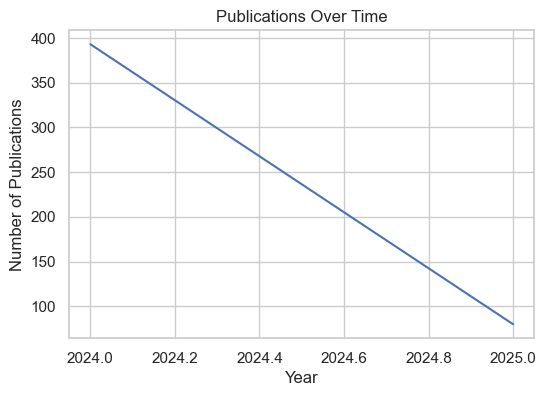

In [52]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=publications_per_year, x='Year', y='Publication')
plt.title('Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


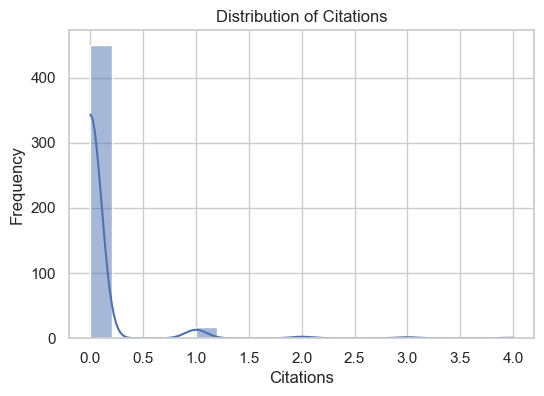

In [53]:
# Citations statistics
plt.figure(figsize=(6, 4))
sns.histplot(scopus_data['Citations'], bins=20, kde=True)
plt.title('Distribution of Citations')
plt.xlabel('Citations')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

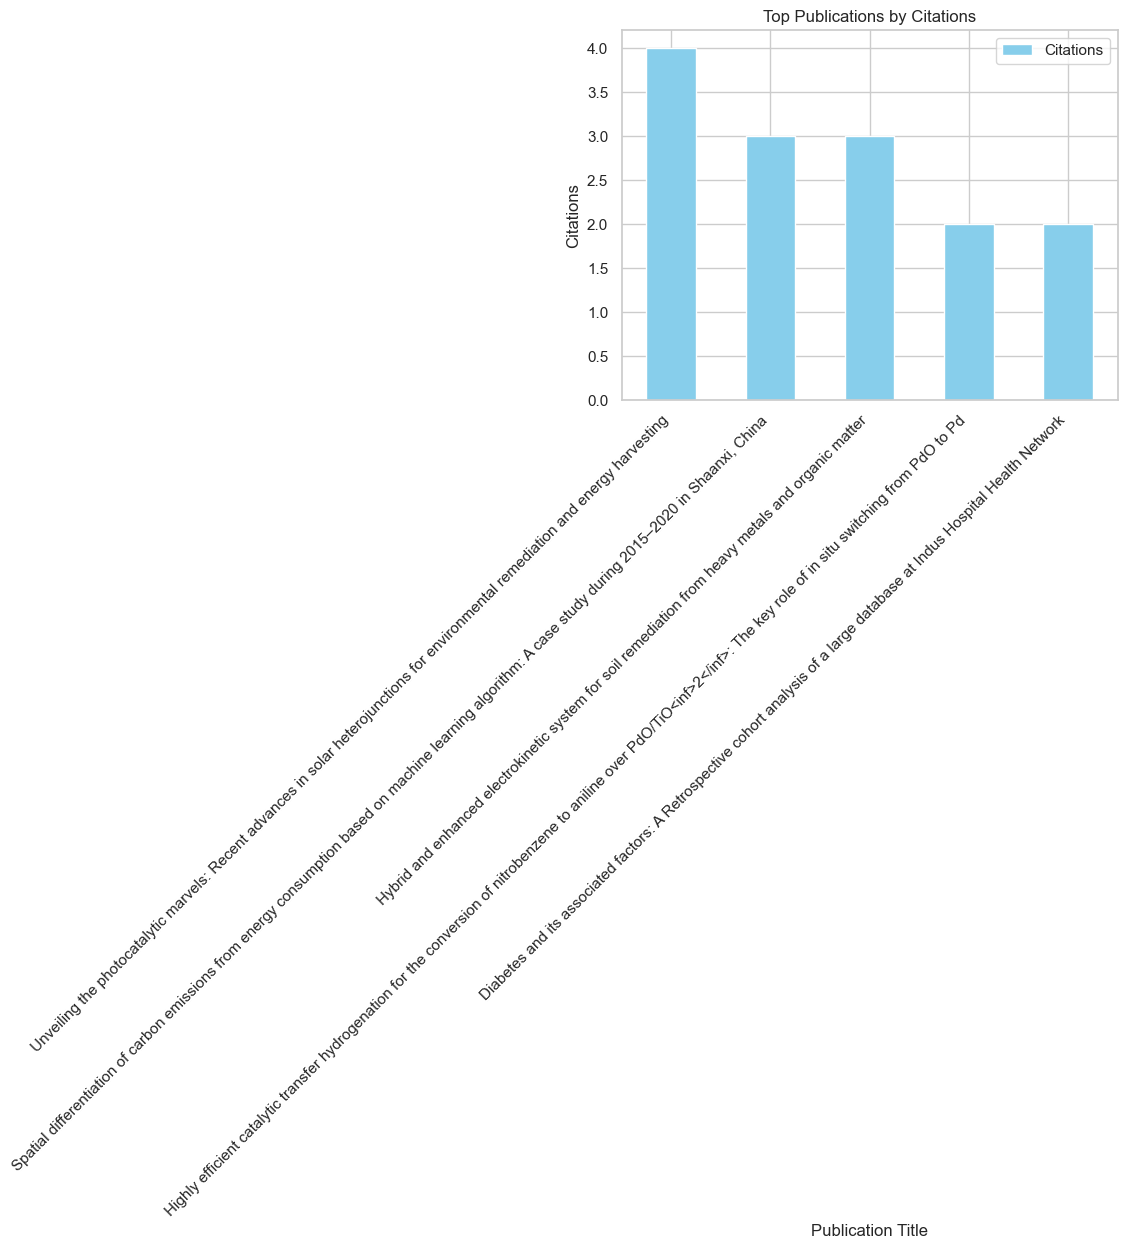

In [54]:
# Top publications by citations
plt.figure(figsize=(8, 6))
top_publications.plot(kind='bar', x='Title', y='Citations', color='skyblue')
plt.title('Top Publications by Citations')
plt.xlabel('Publication Title')
plt.ylabel('Citations')
plt.xticks(rotation=45, ha="right")
plt.show()